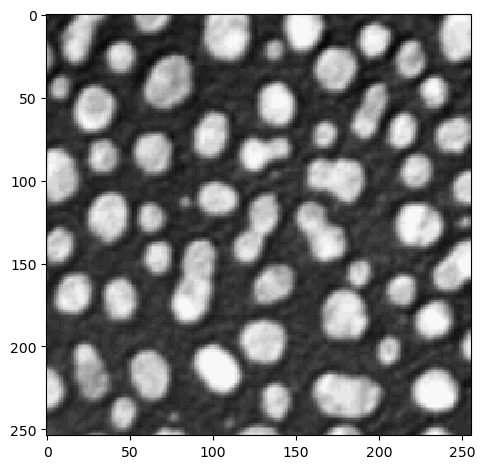

In [1]:
from skimage.io import imread, imshow

import napari_segment_blobs_and_things_with_membranes as nsbatwm

blobs = imread('https://fiji.sc/samples/blobs.png')
imshow(blobs)

## Voronoi-Otsu-Labeling

StackViewNDArray([[0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
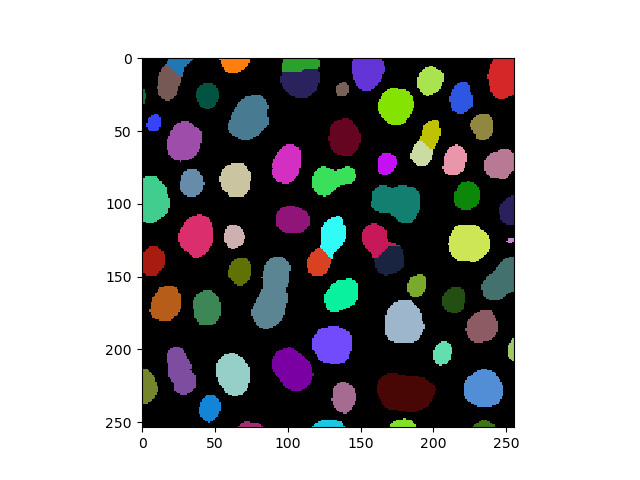

In [2]:
labels = nsbatwm.voronoi_otsu_labeling(blobs, spot_sigma=3.5, outline_sigma=1)
labels

## Gauss-Otsu-Labeling

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
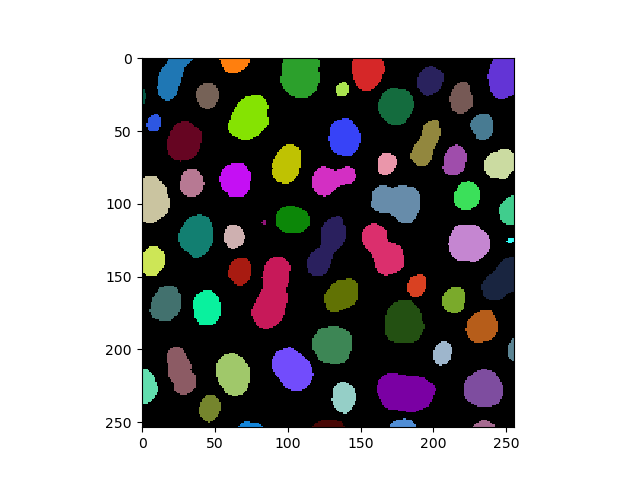

In [3]:
labels = nsbatwm.gauss_otsu_labeling(blobs, outline_sigma=1)
labels

## Threshold Otsu

StackViewNDArray([[0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
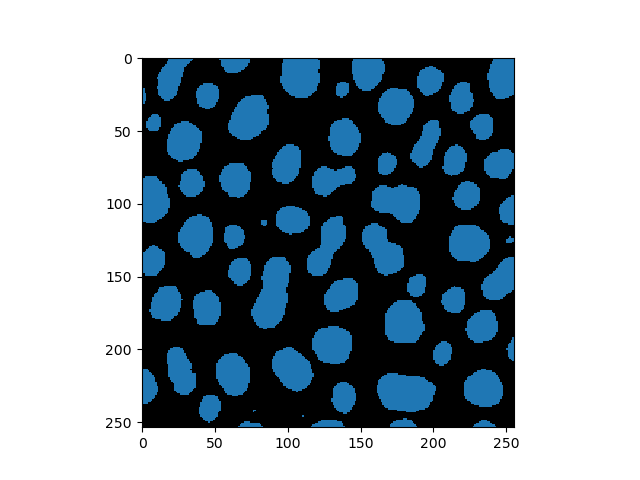

In [4]:
binary = nsbatwm.threshold_otsu(blobs)
binary

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [ True, False, False, ..., False, False, False]])
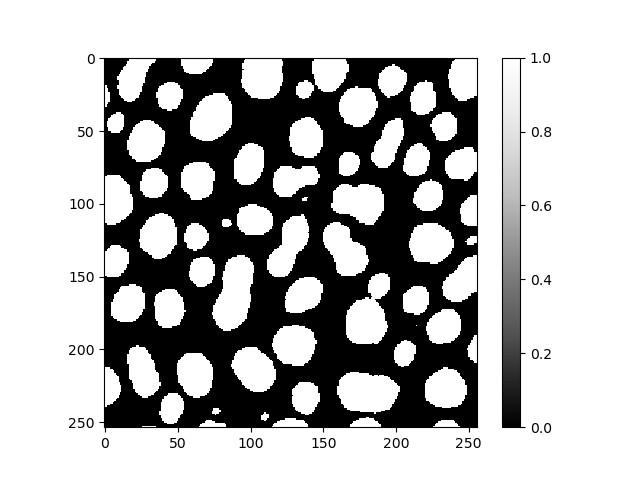
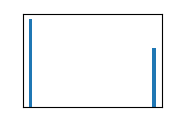

In [5]:
binary = nsbatwm.threshold_yen(blobs)
binary

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
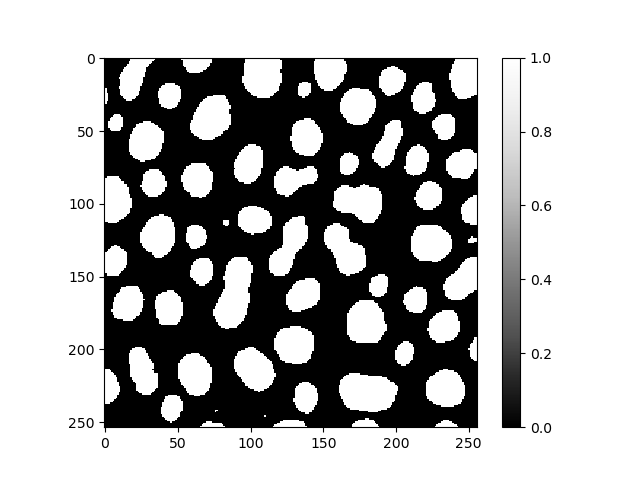
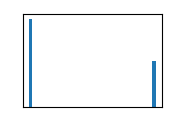

In [6]:
binary = nsbatwm.threshold_isodata(blobs)
binary

## Binary invert

StackViewNDArray([[1, 1, 1, ..., 0, 0, 0],
                  [1, 1, 1, ..., 0, 0, 0],
                  [1, 1, 1, ..., 0, 0, 0],
                  ...,
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1]])
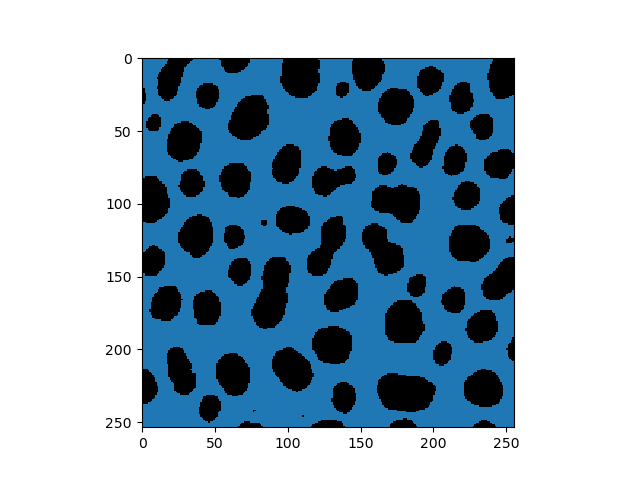

In [7]:
inverted_binary = nsbatwm.binary_invert(binary)
inverted_binary

## Connected component labeling

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
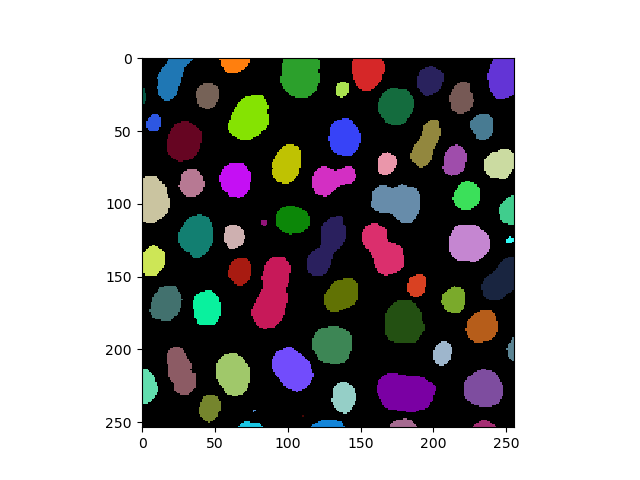

In [8]:
labels = nsbatwm.connected_component_labeling(binary)
labels

## Split touching objects (formerly known as binary watershed)

StackViewNDArray([[0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
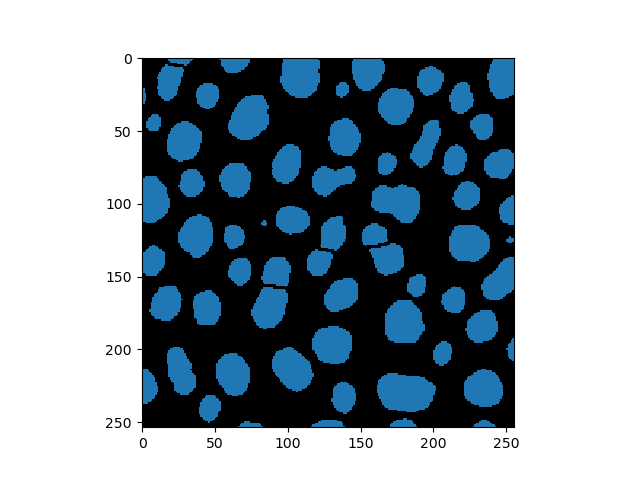

In [9]:
split_objects = nsbatwm.split_touching_objects(binary) * 1
split_objects

## Seeded waterhed

In [10]:
from skimage import data
cells = data.cells3d()

nuclei = cells[30, 1]
nuclei

array([[ 8868,  6923,  5690, ..., 13942, 12804, 14653],
       [ 7113,  5501,  5216, ..., 16739, 13657, 15554],
       [ 5833,  7160,  5928, ..., 15838, 16739, 17166],
       ...,
       [ 2513,  3936,  3414, ...,  3699,  4126,  4220],
       [ 3319,  3272,  2513, ...,  3699,  3367,  2940],
       [ 3130,  3794,  3225, ...,  2987,  3746,  4315]], dtype=uint16)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
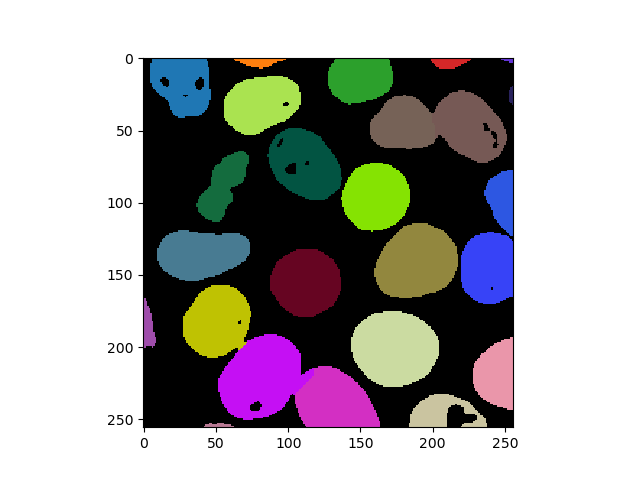

In [11]:
labeled_nuclei = nsbatwm.voronoi_otsu_labeling(nuclei, spot_sigma=10)
labeled_nuclei

In [12]:
membranes = cells[30, 0]
membranes

array([[4496, 5212, 6863, ..., 2917, 2680, 2642],
       [4533, 5146, 7555, ..., 2843, 2857, 2748],
       [4640, 6082, 8452, ..., 3372, 3039, 3128],
       ...,
       [1339, 1403, 1359, ..., 4458, 4314, 4795],
       [1473, 1560, 1622, ..., 3967, 4531, 4204],
       [1380, 1368, 1649, ..., 3091, 3558, 3682]], dtype=uint16)

StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25]])
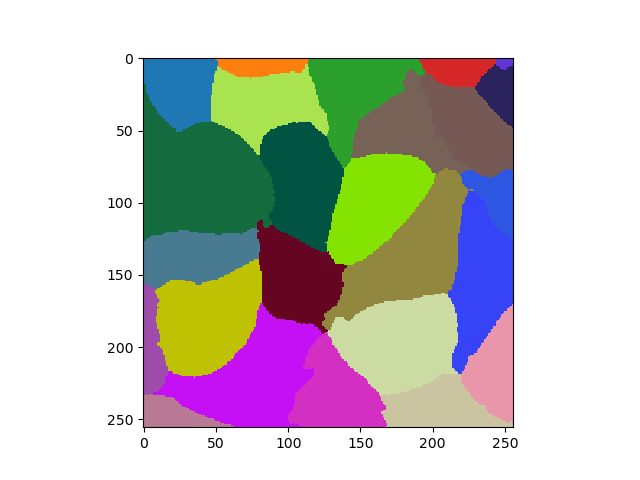

In [13]:
cells = nsbatwm.seeded_watershed(membranes, labeled_nuclei)
cells

# Mode filter for correcting label images


StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 21, 21, 21],
                  [24, 24, 24, ..., 21, 21, 21],
                  [24, 24, 24, ..., 21, 21, 21]])
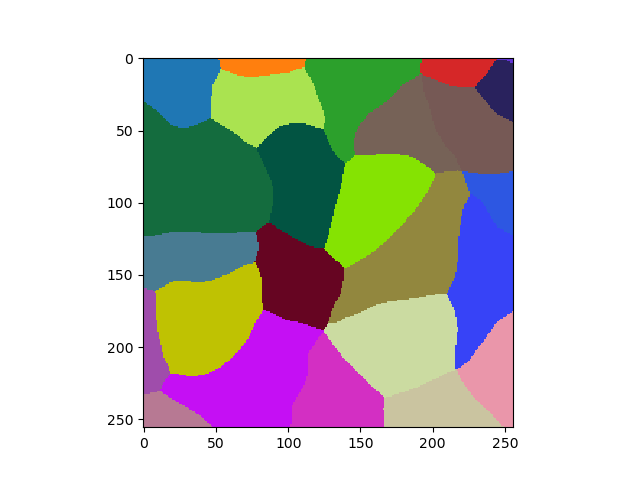

In [14]:
modified_cells = nsbatwm.mode_filter(cells, radius=10)
modified_cells

## Subtract background

StackViewNDArray([[1074, 2327, 4540, ...,  275,   38,    0],
                  [1396, 2494, 5354, ...,  201,  215,  106],
                  [1581, 3523, 6255, ...,  730,  397,  486],
                  ...,
                  [ 124,  188,  144, ..., 2167, 2023, 2501],
                  [ 258,  345,  407, ..., 1520, 2079, 1436],
                  [ 164,  152,  433, ...,  904, 1106, 1227]], dtype=uint16)
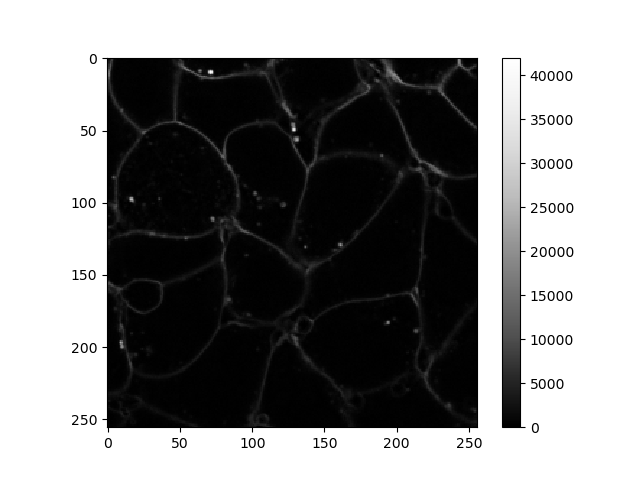
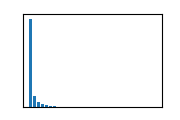

In [15]:
nsbatwm.subtract_background(membranes)

## Denoising

StackViewNDArray([[ 32.,  32.,  32., ..., 240., 240., 240.],
                  [ 32.,  32.,  32., ..., 232., 232., 232.],
                  [ 40.,  32.,  32., ..., 232., 232., 232.],
                  ...,
                  [ 72.,  72.,  72., ...,  48.,  48.,  48.],
                  [ 72.,  72.,  72., ...,  48.,  48.,  48.],
                  [ 72.,  72.,  72., ...,  48.,  48.,  48.]])
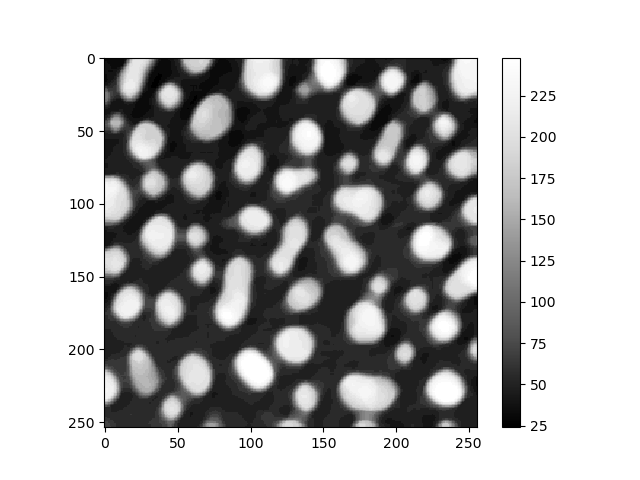
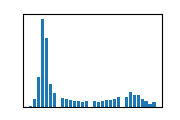

In [16]:
denoised = nsbatwm.median_filter(blobs, radius=5)
denoised

StackViewNDArray([[-61.10753838, -69.0215267 , -76.93420079, ...,
                   114.64659525,  98.72609044,  98.808185  ],
                  [-45.10698772, -61.02053912, -76.93278021, ...,
                   130.64618176, 114.72590105, 114.80832854],
                  [-37.10775388, -53.02092387, -76.93278459, ...,
                   138.64458006, 130.72449227, 130.80720886],
                  ...,
                  [-29.12031907, -21.03564591, -20.9496795 , ...,
                   -53.36337213, -53.28450195, -53.20337803],
                  [-21.11389545, -21.02880292, -20.94239899, ...,
                   -53.35778304, -53.27873693, -53.1973247 ],
                  [ -5.10973428, -13.02418691, -20.93732196, ...,
                   -53.35458326, -53.27532174, -53.1935778 ]])
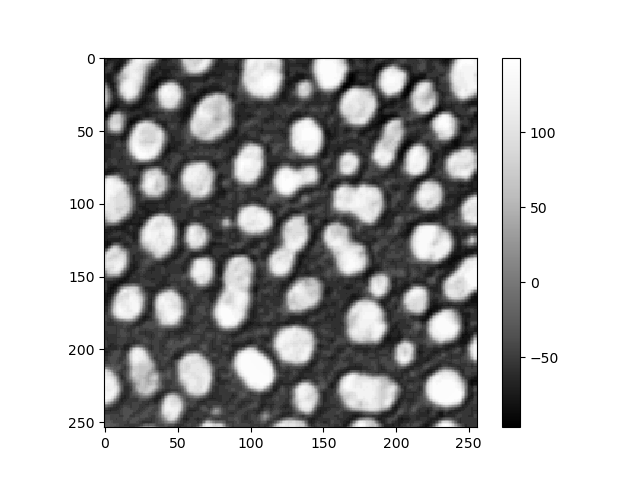
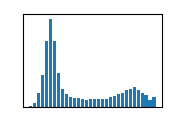

In [17]:
denoised = nsbatwm.butterworth(blobs, cutoff_frequency_ratio=0.005, high_pass=True, order=2)
denoised

## Segment watershed using local minima as seeds

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
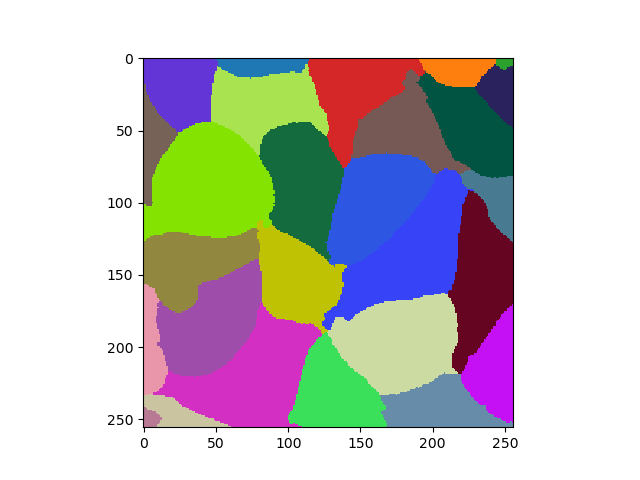

In [18]:
cells = nsbatwm.local_minima_seeded_watershed(membranes)
cells

## Skeletonization

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
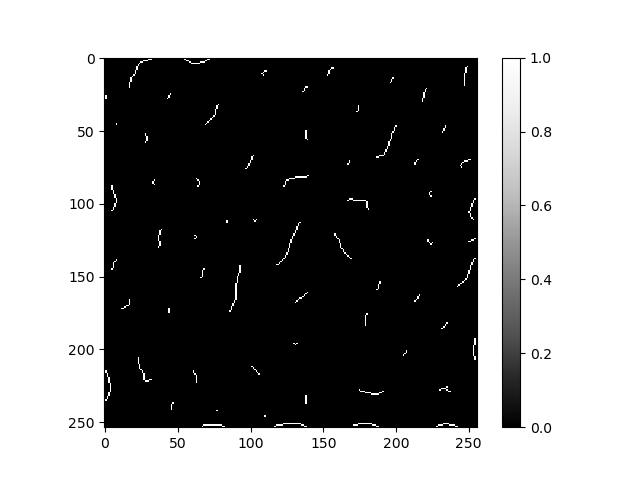
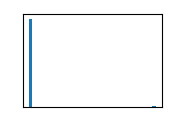

In [19]:
binary_skeleton = nsbatwm.skeletonize(binary)
binary_skeleton

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
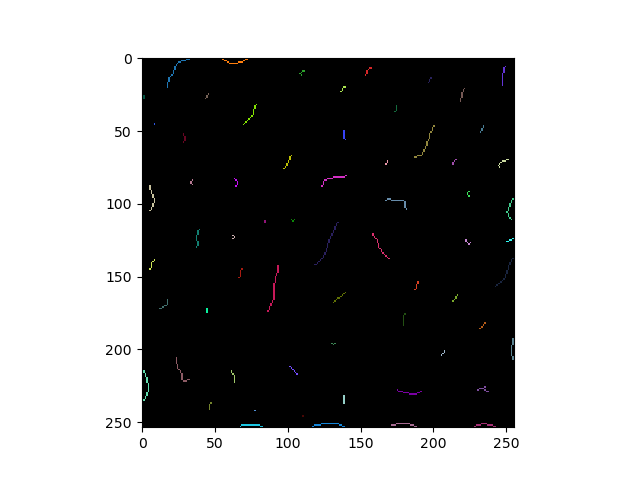

In [20]:
labeled_skeleton = nsbatwm.skeletonize(labels)
labeled_skeleton